# About Dataset

### Context
This dataset contains customer information from a telecommunications company, including details about their demographics, services subscribed, account information, and most importantly - whether they churned (left the company). Customer churn prediction is a critical business problem in the telecom industry, as acquiring new customers is typically more expensive than retaining existing ones.

### Data Description
The dataset contains 7043 customer records with 21 features, including the target variable.

#### Feature Categories:

**Demographic Information:**
- `customerID`: Unique identifier for each customer
- `gender`: Customer gender (Male, Female)
- `SeniorCitizen`: Whether the customer is a senior citizen (1, 0)
- `Partner`: Whether the customer has a partner (Yes, No)
- `Dependents`: Whether the customer has dependents (Yes, No)

**Service Information:**
- `PhoneService`: Whether the customer has a phone service (Yes, No)
- `MultipleLines`: Whether the customer has multiple lines (Yes, No, No phone service)
- `InternetService`: Customer's internet service provider (DSL, Fiber optic, No)
- `OnlineSecurity`: Whether the customer has online security (Yes, No, No internet service)
- `OnlineBackup`: Whether the customer has online backup (Yes, No, No internet service)
- `DeviceProtection`: Whether the customer has device protection (Yes, No, No internet service)
- `TechSupport`: Whether the customer has tech support (Yes, No, No internet service)
- `StreamingTV`: Whether the customer has streaming TV (Yes, No, No internet service)
- `StreamingMovies`: Whether the customer has streaming movies (Yes, No, No internet service)

**Account Information:**
- `tenure`: Number of months the customer has stayed with the company
- `Contract`: The contract term (Month-to-month, One year, Two year)
- `PaperlessBilling`: Whether the customer has paperless billing (Yes, No)
- `PaymentMethod`: Customer's payment method (Electronic check, Mailed check, Bank transfer, Credit card)
- `MonthlyCharges`: The amount charged to the customer monthly
- `TotalCharges`: The total amount charged to the customer

**Target Variable:**
- `Churn`: Whether the customer churned (Yes, No)

### Business Problem
The goal is to predict customer churn to enable proactive retention strategies. By identifying customers at high risk of leaving, the company can target them with special offers, improved service, or other retention tactics.

### Data Characteristics
- **Number of instances:** 7,043
- **Number of features:** 21 (including target)
- **Missing values:** Minimal (primarily in TotalCharges for new customers)
- **Class distribution:** Imbalanced (approximately 73% No Churn, 27% Yes Churn)

### Potential Challenges
1. **Class imbalance** between churned and non-churned customers
2. **Mixed data types** - numerical, categorical, and binary features
3. **Correlated features** among service subscriptions
4. **Data leakage** considerations - ensuring features are available at prediction time

### Source
This is a publicly available dataset commonly used for churn prediction modeling and can be found on platforms like Kaggle.

# Data Loading

In [123]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kaggle.api.kaggle_api_extended import KaggleApi

RND_SEED = 42

def download_telco_churn_dataset(data_dir='data'):
    """
    Скачивает датасет Telco Customer Churn с Kaggle
    """
    # Создаем папку для данных, если её нет
    os.makedirs(data_dir, exist_ok=True)
    
    try:
        # Инициализируем Kaggle API
        api = KaggleApi()
        api.authenticate()
        
        # Скачиваем датасет
        dataset_name = 'blastchar/telco-customer-churn'
        api.dataset_download_files(dataset_name, path=data_dir, unzip=True)
        
        print(f"✅ Датaсет успешно скачан в папку: {data_dir}")
        
        # Проверяем скачанные файлы
        files = os.listdir(data_dir)
        print(f"📁 Скачанные файлы: {files}")
        
        # Загружаем данные для проверки
        csv_file = [f for f in files if f.endswith('.csv')][0]
        df = pd.read_csv(os.path.join(data_dir, csv_file))
        print(f"📊 Размер датасета: {df.shape}")
        print(f"🎯 Целевая переменная 'Churn': {df['Churn'].value_counts().to_dict()}")
        
        return df
        
    except Exception as e:
        print(f"❌ Ошибка при скачивании: {e}")
        return pd.DataFrame()

if __name__ == "__main__":
    telco = download_telco_churn_dataset('../data/raw')

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
✅ Датaсет успешно скачан в папку: ../data/raw
📁 Скачанные файлы: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']
📊 Размер датасета: (7043, 21)
🎯 Целевая переменная 'Churn': {'No': 5174, 'Yes': 1869}


# EDA

## Посмотрим на общую картину

In [124]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Какие типы будут на выходе:

 #   |Column            |Non-Null Count |Было       |Стало
-----|------------------|---------------|-------    |-----  
 0   |customerID        |7043 non-null  | object    |DROPED 
 1   |gender            |7043 non-null  | object    |int64 (bin) 
 2   |SeniorCitizen     |7043 non-null  | int64     |int64  
 3   |Partner           |7043 non-null  | object    |int64 (bin) 
 4   |Dependents        |7043 non-null  | object    |int64 (bin) 
 5   |tenure            |7043 non-null  | int64     |int64  
 6   |PhoneService      |7043 non-null  | object    |int64 (bin) 
 7   |MultipleLines     |7043 non-null  | object    |int64 (bin) 
 8   |InternetService   |7043 non-null  | object    |OHE
 9   |OnlineSecurity    |7043 non-null  | object    |int64 (bin) 
 10  |OnlineBackup      |7043 non-null  | object    |int64 (bin) 
 11  |DeviceProtection  |7043 non-null  | object    |int64 (bin) 
 12  |TechSupport       |7043 non-null  | object    |int64 (bin) 
 13  |StreamingTV       |7043 non-null  | object    |int64 (bin) 
 14  |StreamingMovies   |7043 non-null  | object    |int64 (bin) 
 15  |Contract          |7043 non-null  | object    |OHE
 16  |PaperlessBilling  |7043 non-null  | object    |int64 (bin) 
 17  |PaymentMethod     |7043 non-null  | object    |OHE
 18  |MonthlyCharges    |7043 non-null  | float64   |float64
 19  |TotalCharges      |7043 non-null  | object    |float64 
 20  |Churn             |7043 non-null  | object    |int64 (bin) 

int64 (bin) - `1/0`

OHE - кодирование `OneHotEncoding`.

In [125]:
telco.duplicated().value_counts()

False    7043
Name: count, dtype: int64

Прямых дубликатов нет!

In [126]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Create Test Dataset

Преобразуем таргет в норм вид

In [127]:
telco['Churn'] = telco['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=RND_SEED, stratify=y
# )

## Cleaning Data

In [ ]:
# telco = X_train.copy()

Сначаал разберемся с колонкой TotalCharges - там флот, но где-то есть пустые строки.

In [128]:
telco["TotalCharges"] = pd.to_numeric(telco["TotalCharges"], errors="coerce")

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
telco["TotalCharges"] = imputer.fit_transform(telco[["TotalCharges"]])

telco["TotalCharges"].isna().sum()

np.int64(0)

Преобразуем все строки с "Yes/No" к `int` "1/0".

In [129]:
bool_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]

for col in bool_cols:
    telco[col] = (telco[col] == "Yes").astype("int")

Теперь разберемся с колонками где по три значения - да/нет/нет_сервиса. Я думаю надо третий вариант добавить в "нет" и закодировать LabelEncoding'ом.

In [130]:
three_ans_cols = ["MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

for col in three_ans_cols:
    telco[col] = (telco[col] == "Yes").astype("int")

In [131]:
telco.drop(columns="customerID", inplace=True)

In [132]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
telco["gender"] = label_enc.fit_transform(telco["gender"])

telco["gender"].value_counts()

gender
1    3555
0    3488
Name: count, dtype: int64

### OneHotEncoding

In [133]:
from sklearn.preprocessing import OneHotEncoder

cat_columns = ["InternetService", "PaymentMethod", "Contract"]

ohe = OneHotEncoder(sparse_output=False, dtype="int")
ohe.fit(telco[cat_columns])
telco_internet_encoded = pd.DataFrame(ohe.transform(telco[cat_columns]), columns=ohe.get_feature_names_out(), index=telco.index)

In [134]:
telco = pd.concat([telco, telco_internet_encoded], axis=1)
telco.drop(columns=cat_columns, inplace=True)

In [135]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

Посмотрим на максимальные/минимальные значения 

Еееей, хотябы щас все типы выглядят адекватно и можно приступить к визуализации всякой всячины.

In [136]:
telco.drop_duplicates(inplace=True)
telco.duplicated().value_counts()

False    7021
Name: count, dtype: int64

## Visualize

Посмотрим на корреляции с таргетом.

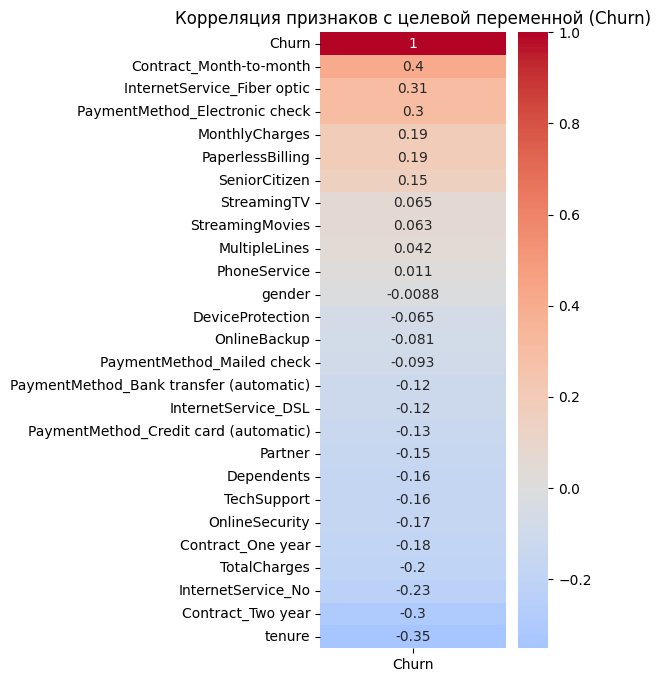

In [137]:
telco_corr = telco.corr()

# Строим тепловую карту только для корреляций с целевой переменной
plt.figure(figsize=(3, 8))
target_corr = telco_corr["Churn"].sort_values(ascending=False)
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция признаков с целевой переменной (Churn)')
plt.show()

Посмотрим на числовые признаки.

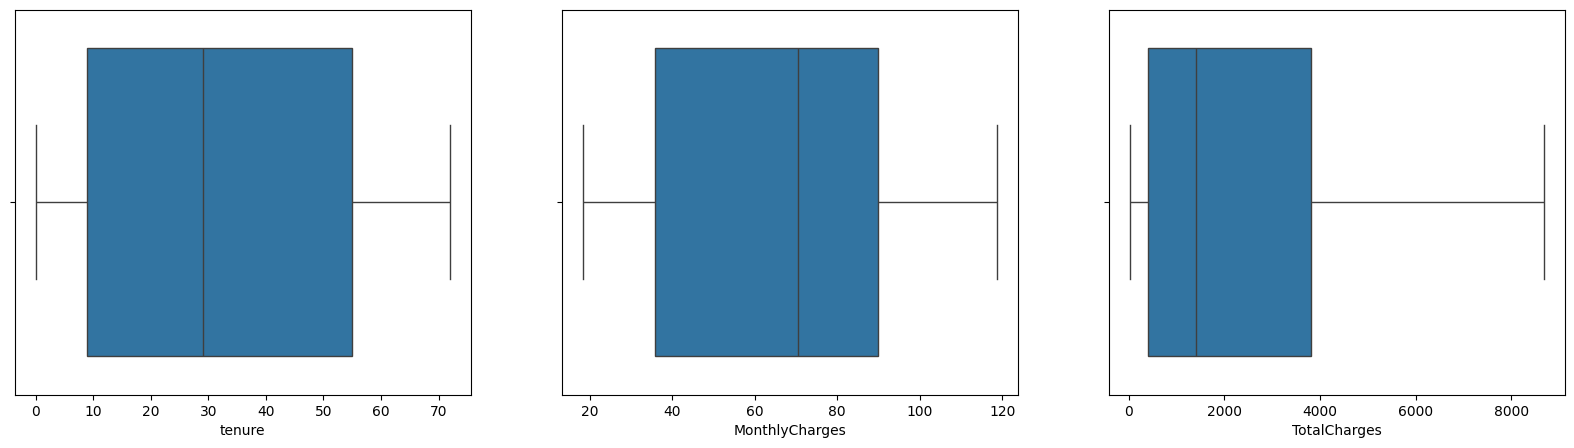

In [138]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(data=telco, x='tenure', ax=axis[0])
sns.boxplot(data=telco, x='MonthlyCharges', ax=axis[1])
sns.boxplot(data=telco, x='TotalCharges', ax=axis[2])
plt.show()

Выбросов не видно, можно продолжать работу!

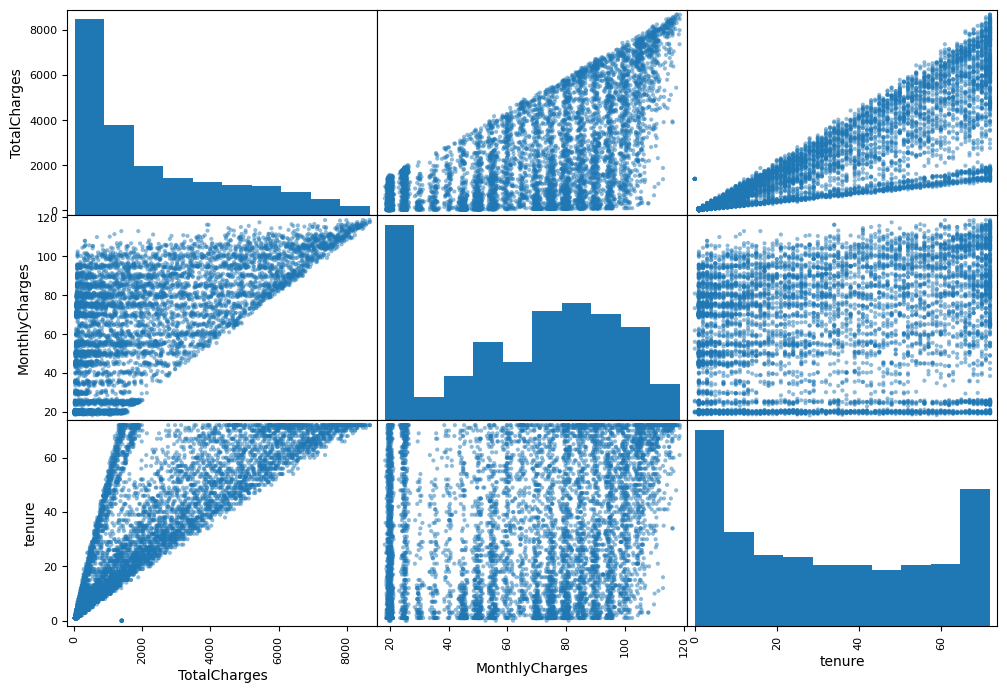

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["TotalCharges", "MonthlyCharges", "tenure"]
scatter_matrix(telco[attributes], figsize=(12, 8))
plt.show()

In [140]:
telco[
    (telco["tenure"] == 0) & (telco["TotalCharges"] > 1000)
][["tenure", "TotalCharges"]]

,tenure,TotalCharges
488,0,1397.475
753,0,1397.475
936,0,1397.475
1082,0,1397.475
1340,0,1397.475
3331,0,1397.475
3826,0,1397.475
4380,0,1397.475
5218,0,1397.475
6670,0,1397.475


Несколько выбросов - дропнем их.

In [141]:
drop_idxs = telco[
    (telco["tenure"] == 0) & (telco["TotalCharges"] > 1000)
].index
telco = telco.drop(drop_idxs)

Посмотрим подробнее на гистограмы.

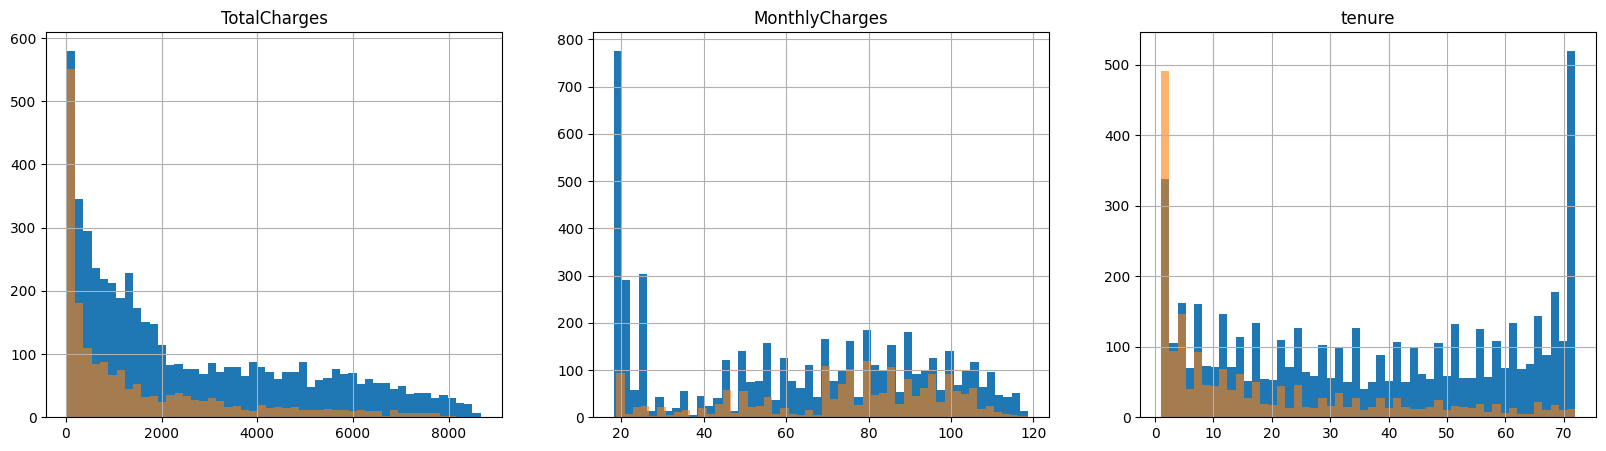

In [192]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))

telco[telco["Churn"] == 0]["TotalCharges"].hist(bins=50, ax=axis[0])
telco[telco["Churn"] == 1]["TotalCharges"].hist(bins=50, ax=axis[0], alpha=0.6)
telco[telco["Churn"] == 0]["MonthlyCharges"].hist(bins=50, ax=axis[1])
telco[telco["Churn"] == 1]["MonthlyCharges"].hist(bins=50, ax=axis[1], alpha=0.6)
telco[telco["Churn"] == 0]["tenure"].hist(bins=50, ax=axis[2])
telco[telco["Churn"] == 1]["tenure"].hist(bins=50, ax=axis[2], alpha=0.6)

axis[0].set_title("TotalCharges")
axis[1].set_title("MonthlyCharges")
axis[2].set_title("tenure")

plt.show()

In [200]:
telco['TotalCharges'].value_counts().sort_index().head(10)

TotalCharges
18.80    1
18.85    2
18.90    1
19.00    1
19.05    1
19.10    3
19.15    1
19.20    4
19.25    3
19.30    4
Name: count, dtype: int64

In [195]:
print(telco[telco['tenure'] == telco['tenure'].min()]["Churn"].value_counts(normalize=True))
print(telco[(telco['tenure'] >= 0) & (telco['tenure'] <= 10)]["Churn"].value_counts(normalize=True))
print(telco[telco['MonthlyCharges'] <= telco['MonthlyCharges'].min() + 3]["Churn"].value_counts(normalize=True))
print(telco[telco['TotalCharges'] <= telco['TotalCharges'].min() + 100]["Churn"].value_counts(normalize=True))

Churn
1    0.622673
0    0.377327
Name: proportion, dtype: float64
Churn
0    0.506453
1    0.493547
Name: proportion, dtype: float64
Churn
0    0.914948
1    0.085052
Name: proportion, dtype: float64
Churn
1    0.516279
0    0.483721
Name: proportion, dtype: float64


Эти данные надо будет логарифмировать и, наверное `rbf` еще бахнуть.

## Preparing Data for Models

### Прологарифмируем `TotalCharges`.

In [ ]:
from sklearn.preprocessing import FunctionTransformer

sqrt_trans = FunctionTransformer(np.sqrt, inverse_func=np.square)
telco["TotalCharges"] = sqrt_trans.transform(telco[["TotalCharges"]])

In [ ]:
telco["TotalCharges"].hist(bins=50)
plt.show()

### Маштабируем данные

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
num_cols = ["tenure", "TotalCharges", "MonthlyCharges"]
telco[num_cols] = std_scaler.fit_transform(telco[num_cols])

In [ ]:
telco[num_cols].hist(bins=50)
plt.show()

## Preprocessing Pipeline

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin


class StringToNumericTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # X будет 2D numpy array с одной колонкой
        if hasattr(X, 'iloc'):  # если это DataFrame
            return pd.to_numeric(X.iloc[:, 0], errors='coerce').values.reshape(-1, 1)
        else:  # если это numpy array
            X_series = pd.Series(X.flatten())
            return pd.to_numeric(X_series, errors='coerce').values.reshape(-1, 1)


def yes_no_func(X):
    return np.where(X == "Yes", 1, 0)


def remove_outliers(X):
    drop_idxs = X[
        (X["tenure"] == 0) & (X["TotalCharges"] > 1000)
    ].index
    X = X.drop(drop_idxs)
    return X


yes_no_handler = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    FunctionTransformer(yes_no_func, feature_names_out="one-to-one")
)
yes_no_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "MultipleLines",
               "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)
cat_cols = ["InternetService", "PaymentMethod", "Contract", "gender"]

sqrt_pipeline = make_pipeline(
    StringToNumericTransformer(),
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.sqrt, feature_names_out="one-to-one"),
    StandardScaler(),
)

default_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

out_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(remove_outliers, feature_names_out="one-to-one")
)

preprocessing = ColumnTransformer([
    ("yes-no", yes_no_handler, yes_no_cols),
    ("cat", cat_pipeline, cat_cols),
    ("drop", "drop", ["customerID", "InternetService", "PaymentMethod", "Contract"]),
    ("sqrt", sqrt_pipeline, ["TotalCharges"]),
], remainder=default_pipeline)

# Models Training

In [ ]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

def get_metrics(y_true, y_pred):
    return {
        'MSE': mse(y_true, y_pred),
        'RMSE': rmse(y_true, y_pred),
        'MAE': mae(y_true, y_pred),
        'R2': r2(y_true, y_pred)
    }

# Создадим словарь с метриками
metrics = {}

In [ ]:
def fit_and_evaluate(model, name):
    model = make_pipeline(preprocessing, model)
    model.fit(X_train, y_train)

    # Вывод модели на тренировочных данных
    model_preds = model.predict(X_train)
    
    # Вывод модели на тестовых данных
    model_test_preds = model.predict(X_test)

    # Сохраняем метрики
    train_metrics = get_metrics(y_train, model_preds)
    metrics[name] = get_metrics(y_test, model_test_preds)
    
    print(f"TRAIN METRICS:\nRMSE: {train_metrics["RMSE"]}\n")
    print(f"TEST METRICS:\nRMSE: {metrics[name]["RMSE"]}\n")
    
    return model[1]

## Lin Regr

In [ ]:
y_train.info()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lr = SVC()
lr = Pipeline([
    ("preproc", preprocessing),
    ("model", lr)
])

lr_rmses = cross_val_score(lr, X_train[:500], y_train[:500], cv=10, scoring="f1")

pd.Series(lr_rmses).describe()

In [ ]:
pd.Series(lr_rmses).head()